In [1]:
import scipy.io
from matplotlib import pyplot as plt
import os
import cv2
import pandas as pd
from classes import Imagem

BASE_DATASET_IMAGES_PATH = "./dataset"
STANFORD_SET_PATH = os.path.join(BASE_DATASET_IMAGES_PATH, "stanford_by_class")
STANFORD_TRAIN_PATH = os.path.join(STANFORD_SET_PATH, "car_data/car_data/train/")

In [3]:
def show_img(img):
    #Show the image with matplotlib
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.xticks([])
    plt.yticks([])
    plt.show()
    plt.close()

In [5]:
def set_search():
    stanford_training_set = {}
    for path, subdirs, files in os.walk(STANFORD_TRAIN_PATH):
        for img_name in files:
            stanford_training_set[img_name] = os.path.join(path, img_name)
    return stanford_training_set

def set_define():
    colnames=['fname', 'x0', 'y0', 'x1', 'y1', 'label']
    labels = pd.read_csv(os.path.join(STANFORD_SET_PATH, "anno_train.csv"), names=colnames, header=None)

    return labels

In [6]:
stanford_training_set = set_search()
labels = set_define()

In [4]:
#Train Images
train_images = []

for index, row in labels.iterrows():
    bounding_box = (row['x0'], row['y0'], row['x1'], row['y1'])
    label = row['label']
    path = stanford_training_set[row['fname']]
    img = Imagem(path=path, bounding_box=bounding_box, label=label)

    train_images.append(img)

In [12]:
def draw_bbox(img, img_row):
    x0 = img_row['x0']
    x1 = img_row['x1']
    y0 = img_row['y0']
    y1 = img_row['y1']

    start_point = (x0, y0)
    end_point = (x1, y1)
    print(start_point, end_point)
    cv2.rectangle(img, start_point, end_point, color=(0,255,0), thickness=2)

    cv2.imwrite("example_with_bounding_boxes.jpg", img)

    show_img(img)


(39, 116) (569, 375)


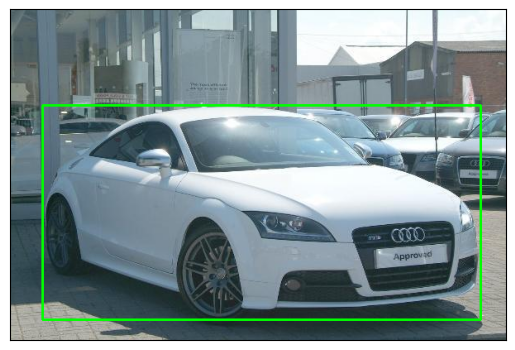

In [13]:
draw_bbox(stanford_training_set[labels.iloc[0]['fname']], labels.iloc[0])

## MODEL

In [14]:
BATCH_SIZE = 8 # increase / decrease according to GPU memeory
RESIZE_TO = 256 # resize the image for training and transforms
NUM_EPOCHS = 10 # number of epochs to train for
NUM_WORKERS = -1 